<a href="https://colab.research.google.com/github/mukund-n/EDA---DA---21BDS0001/blob/main/EDA_21BDS0001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading the dataset:

In [171]:
import pandas as pd
import numpy as np
link = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/CreditCard.csv'
BDS0001 = pd.read_csv(link)
BDS0001.head()

,rownames,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,2,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,3,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,4,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,5,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


# Module 2

In [122]:
BDS0001.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rownames     1319 non-null   int64  
 1   card         1319 non-null   object 
 2   reports      1319 non-null   int64  
 3   age          1319 non-null   float64
 4   income       1319 non-null   float64
 5   share        1319 non-null   float64
 6   expenditure  1319 non-null   float64
 7   owner        1319 non-null   object 
 8   selfemp      1319 non-null   object 
 9   dependents   1319 non-null   int64  
 10  months       1319 non-null   int64  
 11  majorcards   1319 non-null   int64  
 12  active       1319 non-null   int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 134.1+ KB


In [123]:
BDS0001.describe()

,rownames,reports,age,income,share,expenditure,dependents,months,majorcards,active
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,660.000000,0.456406,33.213103,3.365376,0.068732,185.057071,0.993935,55.267627,0.817286,6.996967
std,380.906813,1.345267,10.142783,1.693902,0.094656,272.218917,1.247745,66.271746,0.386579,6.305812
min,1.000000,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000
25%,330.500000,0.000000,25.416670,2.243750,0.002316,4.583333,0.000000,12.000000,1.000000,2.000000
50%,660.000000,0.000000,31.250000,2.900000,0.038827,101.298300,1.000000,30.000000,1.000000,6.000000
75%,989.500000,0.000000,39.416670,4.000000,0.093617,249.035800,2.000000,72.000000,1.000000,11.000000
max,1319.000000,14.000000,83.500000,13.500000,0.906320,3099.505000,6.000000,540.000000,1.000000,46.000000


Checking for the possibility to remove some columns:

In [124]:
BDS0001['card'].value_counts()

,count
card,
yes,1023
no,296


In [125]:
BDS0001['selfemp'].value_counts()

,count
selfemp,
no,1228
yes,91


In [126]:
BDS0001['majorcards'].value_counts()

,count
majorcards,
1,1078
0,241


In [127]:
BDS0001['reports'].value_counts()

,count
reports,
0,1060
1,137
2,50
3,24
4,17
5,11
7,6
6,5
11,4


In [128]:
len(BDS0001)

1319

In [129]:
BDS0001.tail(1)

,rownames,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
1318,1319,yes,0,48.25,3.7,0.111619,344.1575,yes,no,2,2,1,0


Modify the dataset to use the coumn "rownames" as index

In [130]:
BDS0001 = BDS0001.set_index(['rownames']).sort_index()
BDS0001.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
rownames,,,,,,,,,,,,
1,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
2,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
3,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
4,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
5,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


Checking for missing data:

In [131]:
BDS0001.isnull().sum()

,0
card,0
reports,0
age,0
income,0
share,0
expenditure,0
owner,0
selfemp,0
dependents,0
months,0


There are no missing values in the dataset.

Now we check for duplicated values excluding the "rownames" column.

In [132]:
BDS0001.columns

Index(['card', 'reports', 'age', 'income', 'share', 'expenditure', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

In [133]:
BDS0001[BDS0001.duplicated(['card', 'reports', 'age', 'income', 'share', 'expenditure', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active'])]

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
rownames,,,,,,,,,,,,


There are no duplicate values in the dataset.

**Let us explore binning operations:**

Based on age:

In [134]:
age_bins_vals = [0,10,20,30,40,50,60,70,80,90,100]
age_bins = pd.cut(BDS0001['age'], age_bins_vals)
age_bins.value_counts()

,count
age,
"(20, 30]",565
"(30, 40]",422
"(40, 50]",219
"(50, 60]",61
"(10, 20]",22
"(60, 70]",19
"(0, 10]",7
"(70, 80]",2
"(80, 90]",2


Based on income:

In [135]:
income_bins = pd.cut(BDS0001['income'], bins=5)
income_bins.value_counts()

,count
income,
"(0.197, 2.868]",648
"(2.868, 5.526]",550
"(5.526, 8.184]",92
"(8.184, 10.842]",24
"(10.842, 13.5]",5


Bases on expenditure:

In [136]:
expenditure_bins_vals = [0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000]
expenditure_bins = pd.cut(BDS0001['expenditure'], expenditure_bins_vals)
expenditure_bins.value_counts()

,count
expenditure,
"(0, 500]",891
"(500, 1000]",90
"(1500, 2000]",10
"(1000, 1500]",8
"(2000, 2500]",2
"(3000, 3500]",1
"(2500, 3000]",0
"(3500, 4000]",0
"(4000, 4500]",0


Based on active:

In [137]:
income_bins = pd.cut(BDS0001['active'], bins=5)
income_bins.value_counts()

,count
active,
"(-0.046, 9.2]",932
"(9.2, 18.4]",317
"(18.4, 27.6]",60
"(27.6, 36.8]",8
"(36.8, 46.0]",2


# Module 3

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

**1. Univariate Analysis**

**For numeical values**

Histogram:

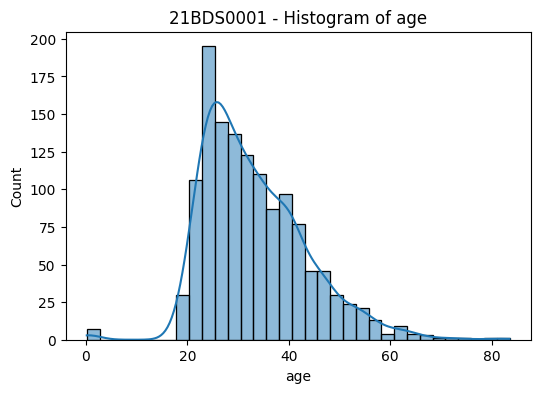

In [139]:
plt.figure(figsize=(6,4))
sns.histplot(BDS0001['age'], kde=True)
plt.title('21BDS0001 - Histogram of age')
plt.show()

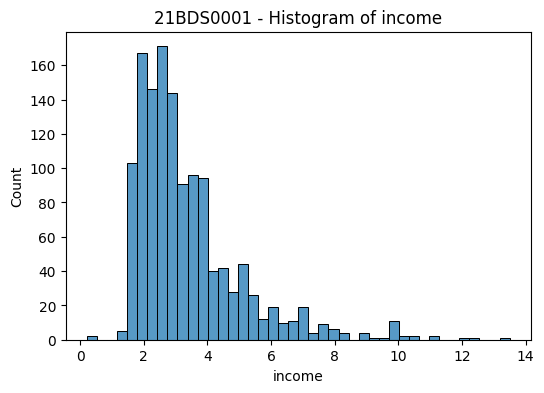

In [140]:
plt.figure(figsize=(6,4))
sns.histplot(BDS0001['income'])
plt.title('21BDS0001 - Histogram of income')
plt.show()

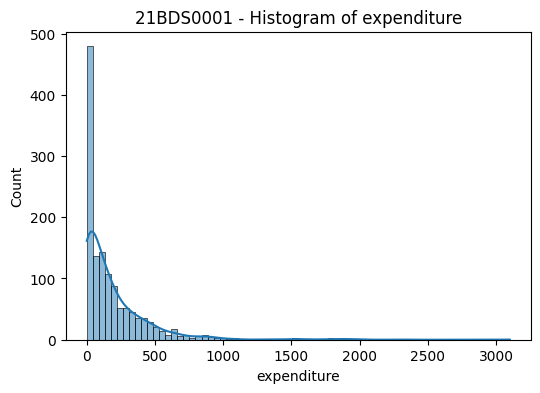

In [141]:
plt.figure(figsize=(6,4))
sns.histplot(BDS0001['expenditure'], kde=True)
plt.title('21BDS0001 - Histogram of expenditure')
plt.show()

Distplot :

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


<Figure size 600x400 with 0 Axes>

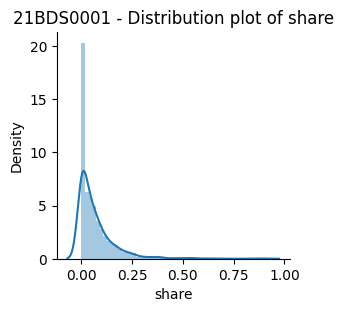

In [142]:
plt.figure(figsize=(6,4))
sns.FacetGrid(BDS0001).map(sns.distplot,"share").add_legend()
plt.title('21BDS0001 - Distribution plot of share')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


<Figure size 600x400 with 0 Axes>

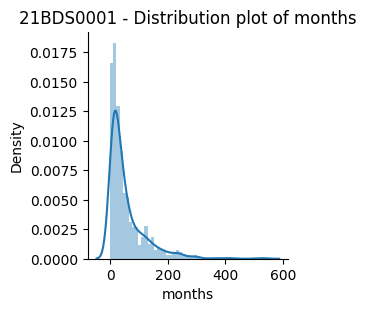

In [143]:
plt.figure(figsize=(6,4))
sns.FacetGrid(BDS0001).map(sns.distplot,"months").add_legend()
plt.title('21BDS0001 - Distribution plot of months')
plt.show()

Box-plot :

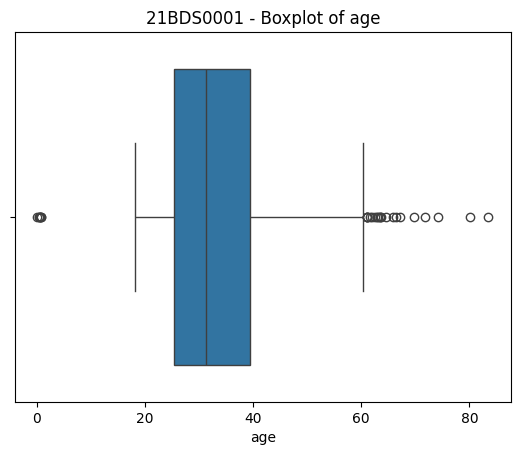

In [144]:
sns.boxplot(x=BDS0001['age'])
plt.title('21BDS0001 - Boxplot of age')
plt.show()

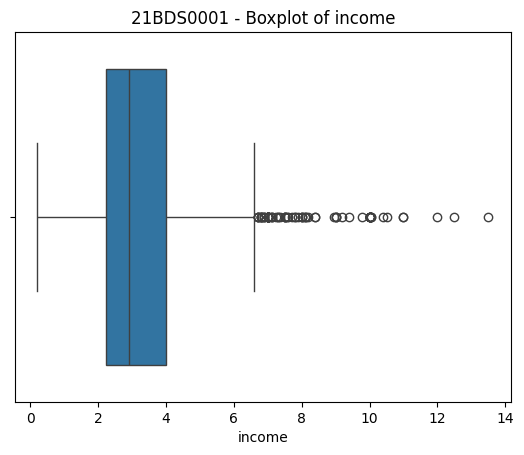

In [145]:
sns.boxplot(x=BDS0001['income'])
plt.title('21BDS0001 - Boxplot of income')
plt.show()

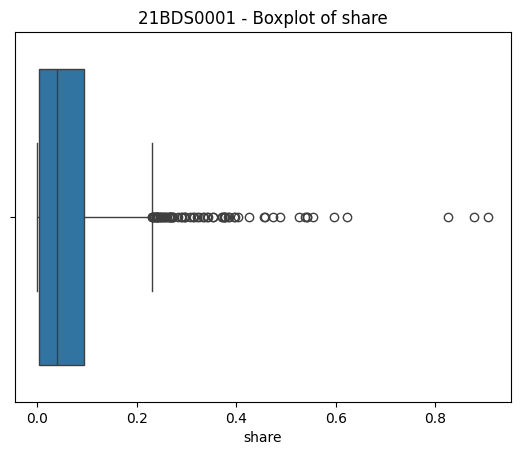

In [146]:
sns.boxplot(x=BDS0001['share'])
plt.title('21BDS0001 - Boxplot of share')
plt.show()

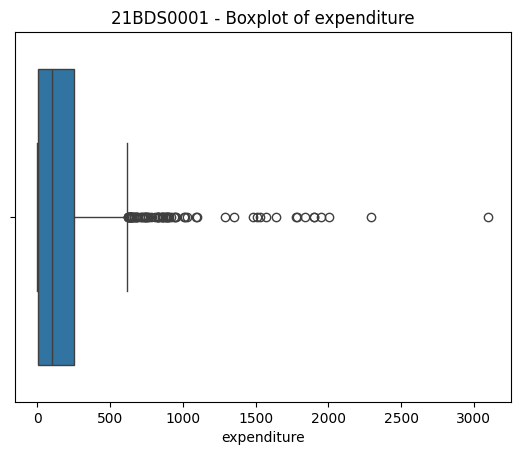

In [147]:
sns.boxplot(x=BDS0001['expenditure'])
plt.title('21BDS0001 - Boxplot of expenditure')
plt.show()

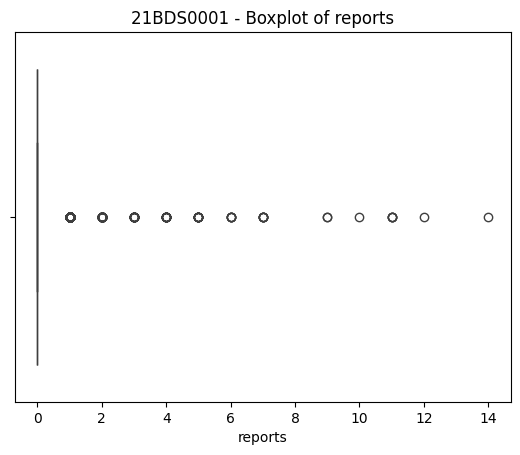

In [148]:
sns.boxplot(x=BDS0001['reports'])
plt.title('21BDS0001 - Boxplot of reports')
plt.show()

**For Categorical Values :**

Bar Chart:

Text(0.5, 0, 'Number of the dependants')

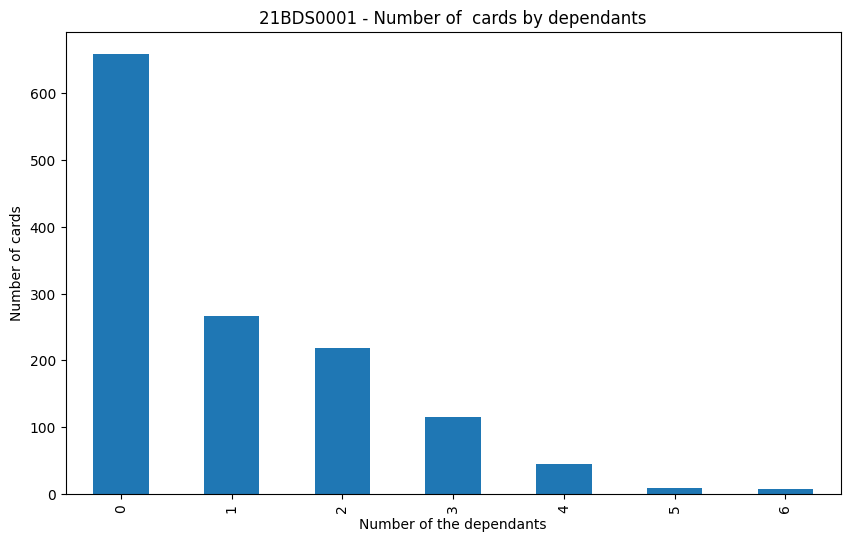

In [149]:
BDS0001.dependents.value_counts().plot(kind='bar', figsize=(10,6))
plt.title("21BDS0001 - Number of  cards by dependants")
plt.ylabel('Number of cards')
plt.xlabel('Number of the dependants')

Countplots:

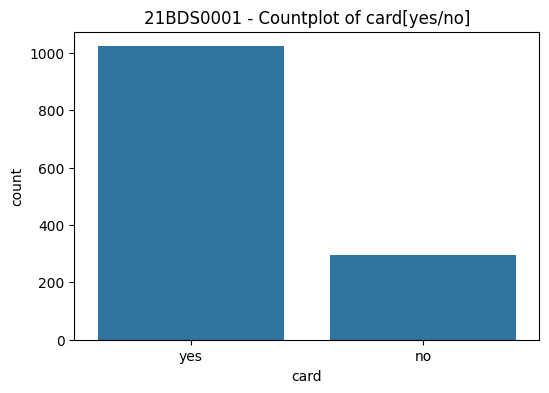

In [150]:
plt.figure(figsize=(6,4))
sns.countplot(x=BDS0001['card'])
plt.title('21BDS0001 - Countplot of card[yes/no]')
plt.show()

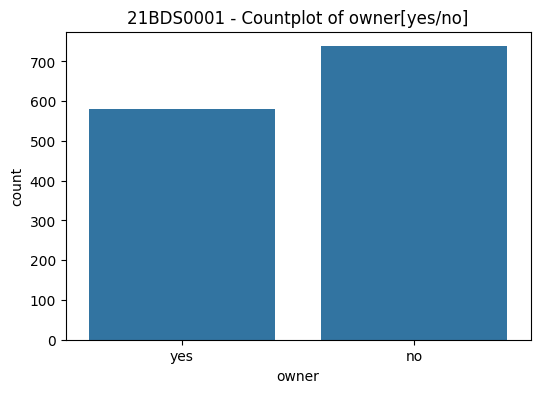

In [151]:
plt.figure(figsize=(6,4))
sns.countplot(x=BDS0001['owner'])
plt.title('21BDS0001 - Countplot of owner[yes/no]')
plt.show()

Pie - chart:

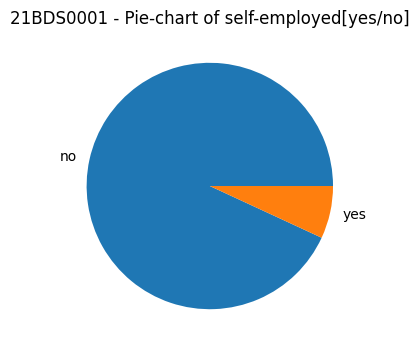

In [152]:
plt.figure(figsize=(6,4))
plt.pie(BDS0001['selfemp'].value_counts(),labels=BDS0001['selfemp'].value_counts().index)
plt.title('21BDS0001 - Pie-chart of self-employed[yes/no]')
plt.show()

**2.Bivariate Analysis :**

Numerical vs. Numerical

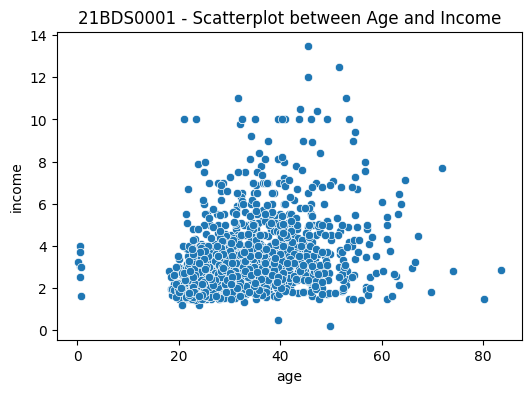

In [153]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='age', y='income', data=BDS0001)
plt.title('21BDS0001 - Scatterplot between Age and Income')
plt.show()

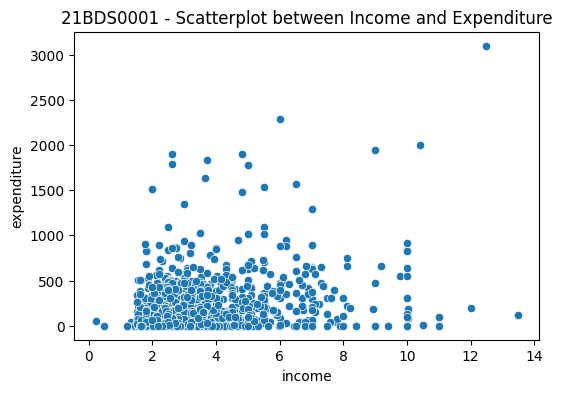

In [154]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='income', y='expenditure', data=BDS0001)
plt.title('21BDS0001 - Scatterplot between Income and Expenditure')
plt.show()

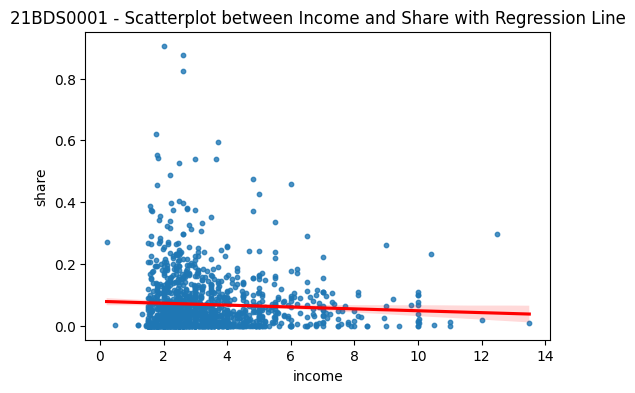

In [155]:
plt.figure(figsize=(6,4))
sns.regplot(x='income', y='share', data=BDS0001, scatter_kws={'s':10}, line_kws={"color": "red"})
plt.title('21BDS0001 - Scatterplot between Income and Share with Regression Line')
plt.show()

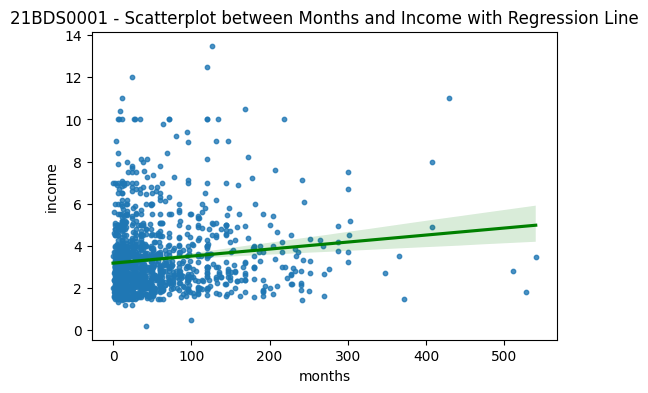

In [156]:
plt.figure(figsize=(6,4))
sns.regplot(x='months', y='income', data=BDS0001, scatter_kws={'s':10}, line_kws={"color": "green"})
plt.title('21BDS0001 - Scatterplot between Months and Income with Regression Line')
plt.show()

Linegraph:

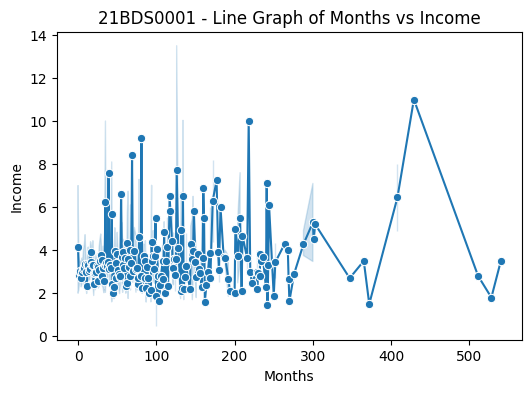

In [157]:
BDS0001_sorted = BDS0001.sort_values(by='months')
plt.figure(figsize=(6,4))
sns.lineplot(x='months', y='income', data=BDS0001_sorted, marker='o')
plt.title('21BDS0001 - Line Graph of Months vs Income')
plt.xlabel('Months')
plt.ylabel('Income')
plt.show()

Numeric vs Categorical:

Box-Plots:

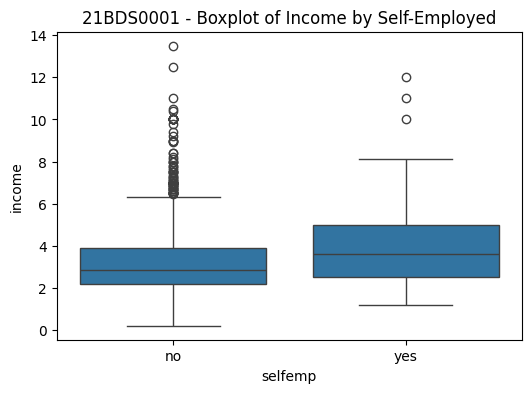

In [158]:
plt.figure(figsize=(6,4))
sns.boxplot(x='selfemp', y='income', data=BDS0001)
plt.title('21BDS0001 - Boxplot of Income by Self-Employed')
plt.show()

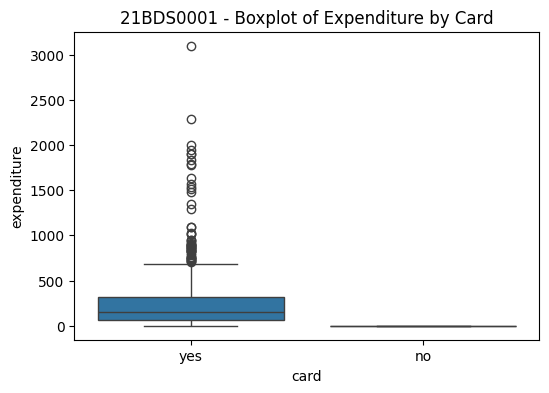

In [159]:
plt.figure(figsize=(6,4))
sns.boxplot(x='card', y='expenditure', data=BDS0001)
plt.title('21BDS0001 - Boxplot of Expenditure by Card')
plt.show()

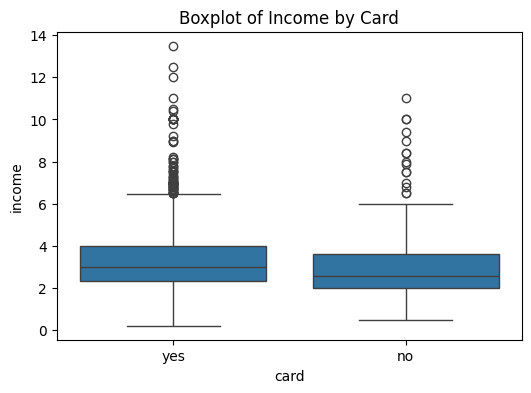

In [160]:
plt.figure(figsize=(6,4))
sns.boxplot(x='card', y='income', data=BDS0001)
plt.title('Boxplot of Income by Card')
plt.show()

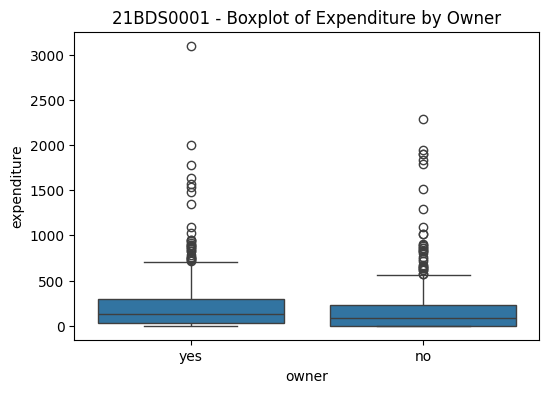

In [161]:
plt.figure(figsize=(6,4))
sns.boxplot(x='owner', y='expenditure', data=BDS0001)
plt.title('21BDS0001 - Boxplot of Expenditure by Owner')
plt.show()

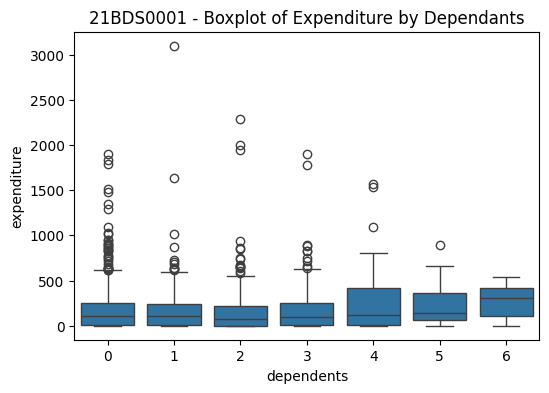

In [162]:
plt.figure(figsize=(6,4))
sns.boxplot(x='dependents', y='expenditure', data=BDS0001)
plt.title('21BDS0001 - Boxplot of Expenditure by Dependants')
plt.show()

Categorical vs Categorical:

Cross Tabulation:

In [163]:
cross_tab = pd.crosstab(BDS0001['card'], BDS0001['owner'])
print(cross_tab)

owner   no  yes
card           
no     206   90
yes    532  491


In [164]:
cross_tab = pd.crosstab(BDS0001['card'], BDS0001['selfemp'])
print(cross_tab)

selfemp   no  yes
card             
no       268   28
yes      960   63


In [165]:
cross_tab = pd.crosstab(BDS0001['selfemp'], BDS0001['dependents'])
print(cross_tab)

dependents    0    1    2    3   4  5  6
selfemp                                 
no          620  246  203  106  38  9  6
yes          39   21   15    9   6  0  1


In [166]:
cross_tab = pd.crosstab(BDS0001['owner'], BDS0001['dependents'])
print(cross_tab)

dependents    0    1    2   3   4  5  6
owner                                  
no          468  131   92  30  12  2  3
yes         191  136  126  85  32  7  4


**3.Multi-Variate Analysis :**

Pair-plot:

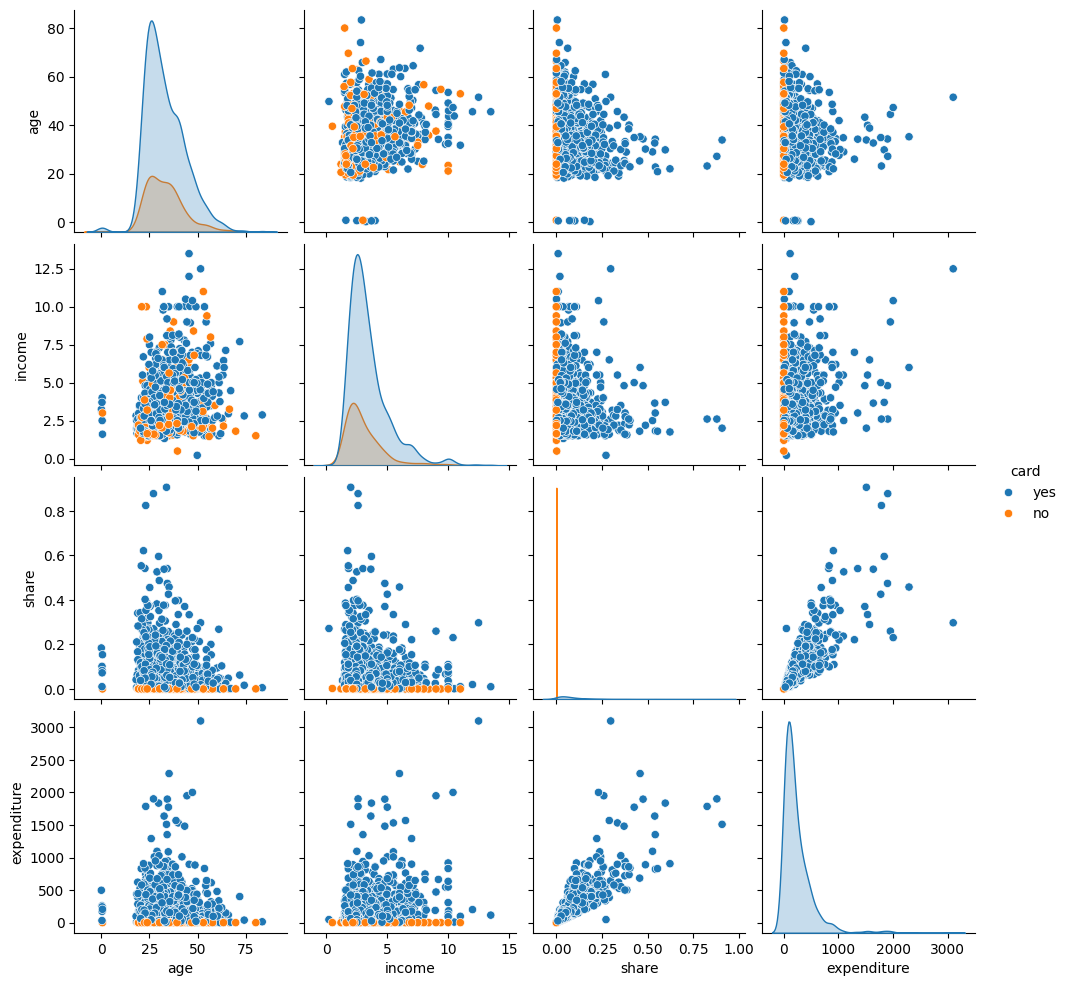

In [167]:
sns.pairplot(BDS0001[['age', 'income', 'share','expenditure', 'card']], hue='card')
plt.show()

In [168]:
correlation = BDS0001.corr(method='pearson', numeric_only=True)
correlation

,reports,age,income,share,expenditure,dependents,months,majorcards,active
reports,1.000000,0.044089,0.011023,-0.159011,-0.136538,0.019731,0.048968,-0.007304,0.207755
age,0.044089,1.000000,0.324653,-0.115697,0.014948,0.212146,0.436426,0.009777,0.181070
income,0.011023,0.324653,1.000000,-0.054429,0.281104,0.317601,0.130346,0.107138,0.180540
share,-0.159011,-0.115697,-0.054429,1.000000,0.838779,-0.082618,-0.055348,0.051470,-0.023474
expenditure,-0.136538,0.014948,0.281104,0.838779,1.000000,0.052664,-0.029007,0.077514,0.054724
dependents,0.019731,0.212146,0.317601,-0.082618,0.052664,1.000000,0.046512,0.010285,0.107133
months,0.048968,0.436426,0.130346,-0.055348,-0.029007,0.046512,1.000000,-0.041447,0.100028
majorcards,-0.007304,0.009777,0.107138,0.051470,0.077514,0.010285,-0.041447,1.000000,0.119603
active,0.207755,0.181070,0.180540,-0.023474,0.054724,0.107133,0.100028,0.119603,1.000000


Heatmap:

<Axes: >

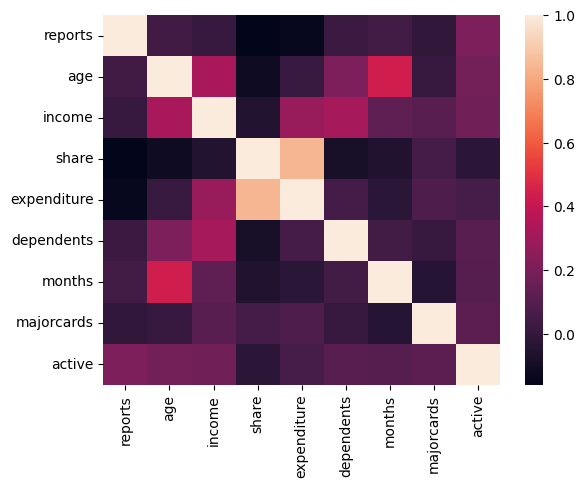

In [169]:
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns)

# Module 4

Statistical summaries:

In [174]:
numerical_columns = ['reports'	,'age'	,'income'	,'share'	,'expenditure' ,'months', 'active']
for col in numerical_columns:
    print(f"{col}:")
    print(f"Mean: {BDS0001[col].mean()}")
    print(f"Trimmed Mean (5%): {BDS0001[col].clip(lower=BDS0001[col].quantile(0.05), upper=BDS0001[col].quantile(0.95)).mean()}")
    print(f"Median: {BDS0001[col].median()}")
    print(f"Quantiles: {BDS0001[col].quantile([0.25, 0.5, 0.75])}")
    print(f"Deciles: {BDS0001[col].quantile([i/10 for i in range(1, 10)])}")
    print(f"Percentiles (1st, 10th, 50th, 90th, 99th): {BDS0001[col].quantile([0.01, 0.10, 0.50, 0.90, 0.99])}")
    print(f"Range: {BDS0001[col].max() - BDS0001[col].min()}")
    IQR = BDS0001[col].quantile(0.75) - BDS0001[col].quantile(0.25)
    print(f"IQR (Interquartile Range): {IQR}")
    interdecile_range = BDS0001[col].quantile(0.9) - BDS0001[col].quantile(0.1)
    print(f"Interdecile Range: {interdecile_range}")
    mean_deviation = np.mean(np.abs(BDS0001[col] - BDS0001[col].mean()))
    print(f"Mean Deviation: {mean_deviation}")
    std_dev = BDS0001[col].std()
    print(f"Standard Deviation: {std_dev}")
    skewness = BDS0001[col].skew()
    print(f"Skewness: {skewness}")
    kurtosis = BDS0001[col].kurt()
    print(f"Kurtosis: {kurtosis}")
    print("\n")

reports:
Mean: 0.4564063684609553
Trimmed Mean (5%): 0.3434420015163002
Median: 0.0
Quantiles: 0.25    0.0
0.50    0.0
0.75    0.0
Name: reports, dtype: float64
Deciles: 0.1    0.0
0.2    0.0
0.3    0.0
0.4    0.0
0.5    0.0
0.6    0.0
0.7    0.0
0.8    0.0
0.9    1.0
Name: reports, dtype: float64
Percentiles (1st, 10th, 50th, 90th, 99th): 0.01    0.0
0.10    0.0
0.50    0.0
0.90    1.0
0.99    7.0
Name: reports, dtype: float64
Range: 14
IQR (Interquartile Range): 0.0
Interdecile Range: 1.0
Mean Deviation: 0.7335720251229911
Standard Deviation: 1.3452674780113136
Skewness: 4.884221486145115
Kurtosis: 30.55668117130953


age:
Mean: 33.21310325496589
Trimmed Mean (5%): 33.04852167551175
Median: 31.25
Quantiles: 0.25    25.41667
0.50    31.25000
0.75    39.41667
Name: age, dtype: float64
Deciles: 0.1    22.666670
0.2    24.750000
0.3    26.500000
0.4    28.500000
0.5    31.250000
0.6    34.166670
0.7    37.383334
0.8    40.866666
0.9    46.916670
Name: age, dtype: float64
Percentiles (1st

2 Way Contingency table done in Bi Variate Analysis

In [177]:
contingency_table = pd.crosstab(BDS0001['selfemp'], BDS0001['card'])
print("Contingency Table (Card vs Owner):\n", contingency_table)

row_profile = contingency_table.div(contingency_table.sum(axis=1), axis=0)
print("\nRow Profile Dataset:\n", row_profile)
column_profile = contingency_table.div(contingency_table.sum(axis=0), axis=1)
print("\nColumn Profile Dataset:\n", column_profile)
relative_frequency = contingency_table.div(contingency_table.sum().sum())
print("\nRelative Frequency Dataset:\n", relative_frequency)
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("\nChi-square Test Results:")
print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:\n", expected)

Contingency Table (Card vs Owner):
 card      no  yes
selfemp          
no       268  960
yes       28   63

Row Profile Dataset:
 card           no       yes
selfemp                    
no       0.218241  0.781759
yes      0.307692  0.692308

Column Profile Dataset:
 card           no       yes
selfemp                    
no       0.905405  0.938416
yes      0.094595  0.061584

Relative Frequency Dataset:
 card           no       yes
selfemp                    
no       0.203184  0.727824
yes      0.021228  0.047763

Chi-square Test Results:
Chi2 Statistic: 3.397863237622845
P-value: 0.06528093265746018
Degrees of Freedom: 1
Expected Frequencies:
 [[275.57846854 952.42153146]
 [ 20.42153146  70.57846854]]


3 Way Contingency Table:

In [179]:
three_way_table = pd.crosstab(index=[BDS0001['card'], BDS0001['owner']], columns=BDS0001['selfemp'])
print("Three-Way Contingency Table:\n", three_way_table)

Three-Way Contingency Table:
 selfemp      no  yes
card owner          
no   no     186   20
     yes     82    8
yes  no     508   24
     yes    452   39


In [182]:
three_way_table = pd.crosstab(index=[BDS0001['card'], BDS0001['selfemp']], columns=BDS0001['dependents'])
print("Three-Way Contingency Table:\n", three_way_table)

Three-Way Contingency Table:
 dependents      0    1    2   3   4  5  6
card selfemp                             
no   no       126   49   58  25   6  2  2
     yes       13    5    5   2   3  0  0
yes  no       494  197  145  81  32  7  4
     yes       26   16   10   7   3  0  1


Scatterplot with 3 variable :

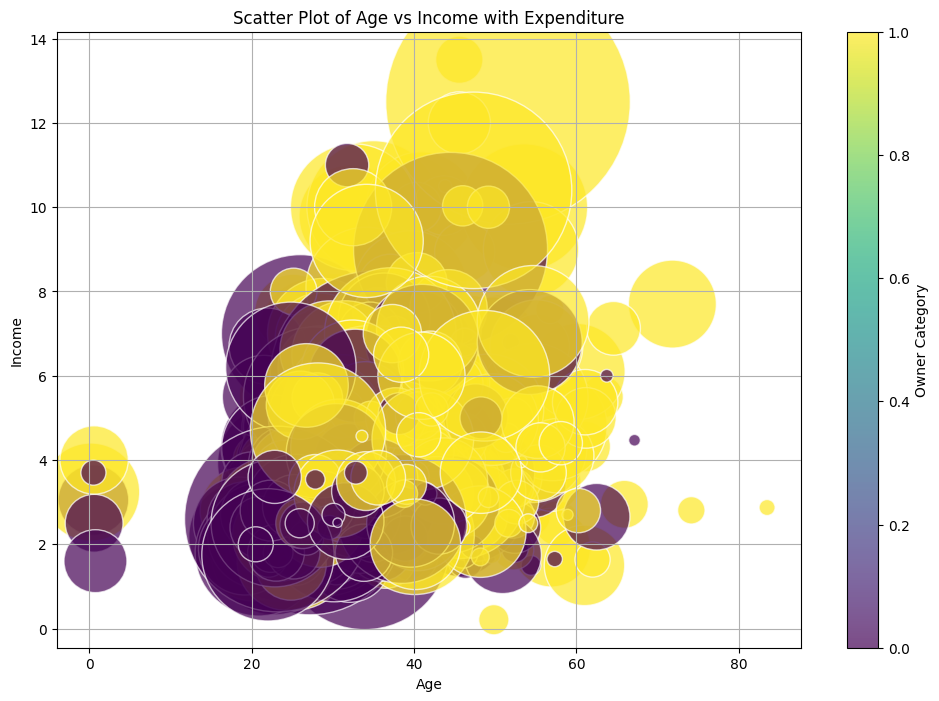

In [184]:
palette = sns.color_palette("husl", len(BDS0001['owner'].unique()))

plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    x=BDS0001['age'],
    y=BDS0001['income'],
    s=BDS0001['expenditure']*10,
    c=BDS0001['owner'].astype('category').cat.codes,
    cmap='viridis',
    alpha=0.7,
    edgecolors='w'
)

plt.colorbar(scatter, label='Owner Category')

plt.title('Scatter Plot of Age vs Income with Expenditure')
plt.xlabel('Age')
plt.ylabel('Income')
plt.grid(True)
plt.show()

3D Scatter Plot:

In [187]:
x = BDS0001['age']
y = BDS0001['income']
z = BDS0001['expenditure']

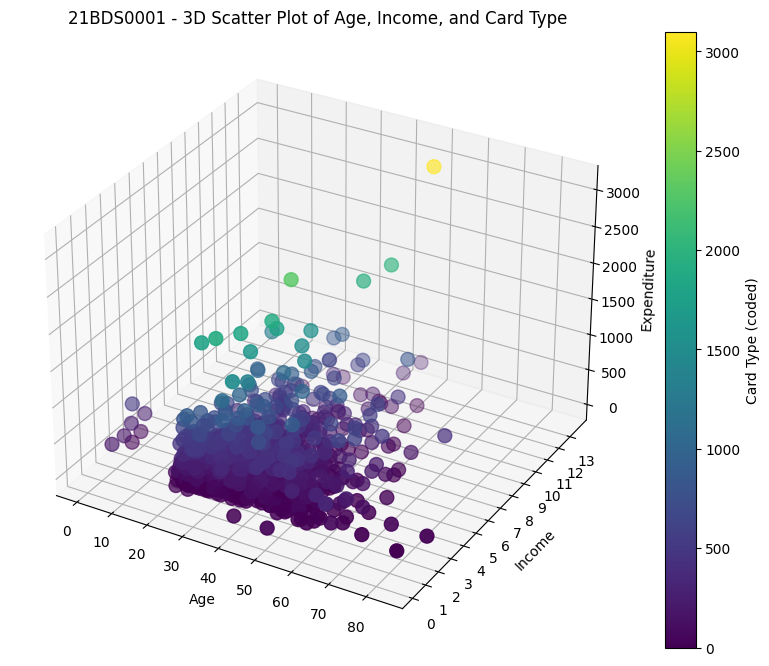

In [193]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=z, cmap='viridis', marker='o', s=100)
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Expenditure')
ax.set_xticks(np.arange(min(x), max(x)+1, 10,dtype=np.int64))
ax.set_yticks(np.arange(min(y), max(y),1,dtype=np.int64))
ax.set_zticks(np.arange(min(z), max(z),500,dtype=np.int64))
cbar = plt.colorbar(scatter)
cbar.set_label('Card Type (coded)')
plt.title('21BDS0001 - 3D Scatter Plot of Age, Income, and Card Type')
plt.show()